In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sonic_screwdrivers import SeparationPlotVisualizer

To read more about separation plots, check out the initial paper:
http://onlinelibrary.wiley.com/doi/10.1111/j.1540-5907.2011.00525.x/abstract

In [3]:
SPV = SeparationPlotVisualizer()

In [4]:
# Generate random  uniform samples between 0 and 1 to represent the probabilities
probs = np.random.uniform(0, 1, 100)

In [5]:
# Generate random data to represent the labels
Y = pd.DataFrame([True if x > 0.5 else False for x in np.random.uniform(0, 1, 100)])

In [6]:
# Separate the probabilities corresponding to true events and false events
SPV.separate_probabilities(probs, Y)

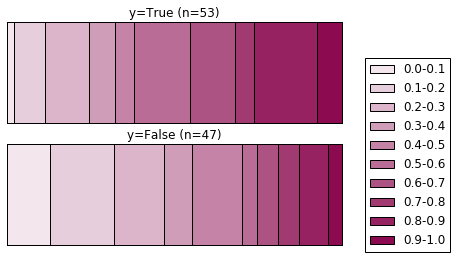

In [7]:
# Create a separation plot based on these separated lists
SPV.create_separation_plot()

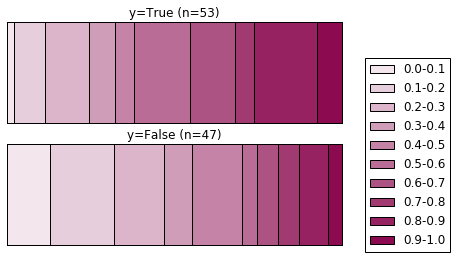

In [8]:
# You can also just use the combined _separate_and_plot method to do this all in one step.
# you can also use a Series
SPV.separate_and_plot(probs, Y.iloc[:, 0])

Check that Exceptions are handled
===

### Handle Nans!


In [9]:
Y.iloc[0] = None

In [10]:
SPV.separate_probabilities(probs, Y)

SonicScrewdriverError: The DataFrame contains NaNs.

In [11]:
Y.iloc[0] = 0

In [12]:
probs[0] = None

In [13]:
SPV.separate_probabilities(probs, Y)

SonicScrewdriverError: The list of probabilities contains NaNs.

In [14]:
probs[0] = 0

### Handle mismatched sizes

In [15]:
probs = np.append(0, probs)

In [16]:
SPV.separate_probabilities(probs, Y)

SonicScrewdriverError: The list of probabilities and Y must be the same size.

### Handle multiple columns

In [17]:
probs = np.random.uniform(0, 1, 100)

In [18]:
Y = pd.DataFrame([[True if x > 0.5 else False for x in np.random.uniform(0, 1, 100)], range(0, 100)]).T

In [19]:
SPV.separate_and_plot(probs, Y)

SonicScrewdriverError: Y must be a one-column DataFrame or Series.

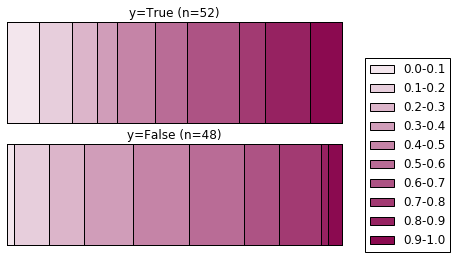

In [20]:
SPV.separate_and_plot(probs, Y.iloc[:, 0])

### Check probs are between 0 and 1

In [21]:
Y = pd.DataFrame([True if x > 0.5 else False for x in np.random.uniform(0, 1, 100)])

In [22]:
probs = np.random.uniform(0, 2, 100)

In [23]:
SPV.separate_and_plot(probs, Y)

SonicScrewdriverError: Probabilities must be between 0 and 1.

In [24]:
probs = np.random.uniform(-1, 1, 100)

In [25]:
SPV.separate_and_plot(probs, Y)

SonicScrewdriverError: Probabilities must be between 0 and 1.

### Call methods in correct order

In [26]:
probs = np.random.uniform(0, 1, 100)

In [27]:
Y = pd.DataFrame([True if x > 0.5 else False for x in np.random.uniform(0, 1, 100)])

In [30]:
SPV = SeparationPlotVisualizer()

In [31]:
SPV.create_separation_plot()

NotFittedError: Call separate_probabilities before create_separation_plot